# ImageNet model visualizations

In [5]:
# load data
import json

with open("../results/ImageNet_results.json", "r") as f:
    results = json.load(f)

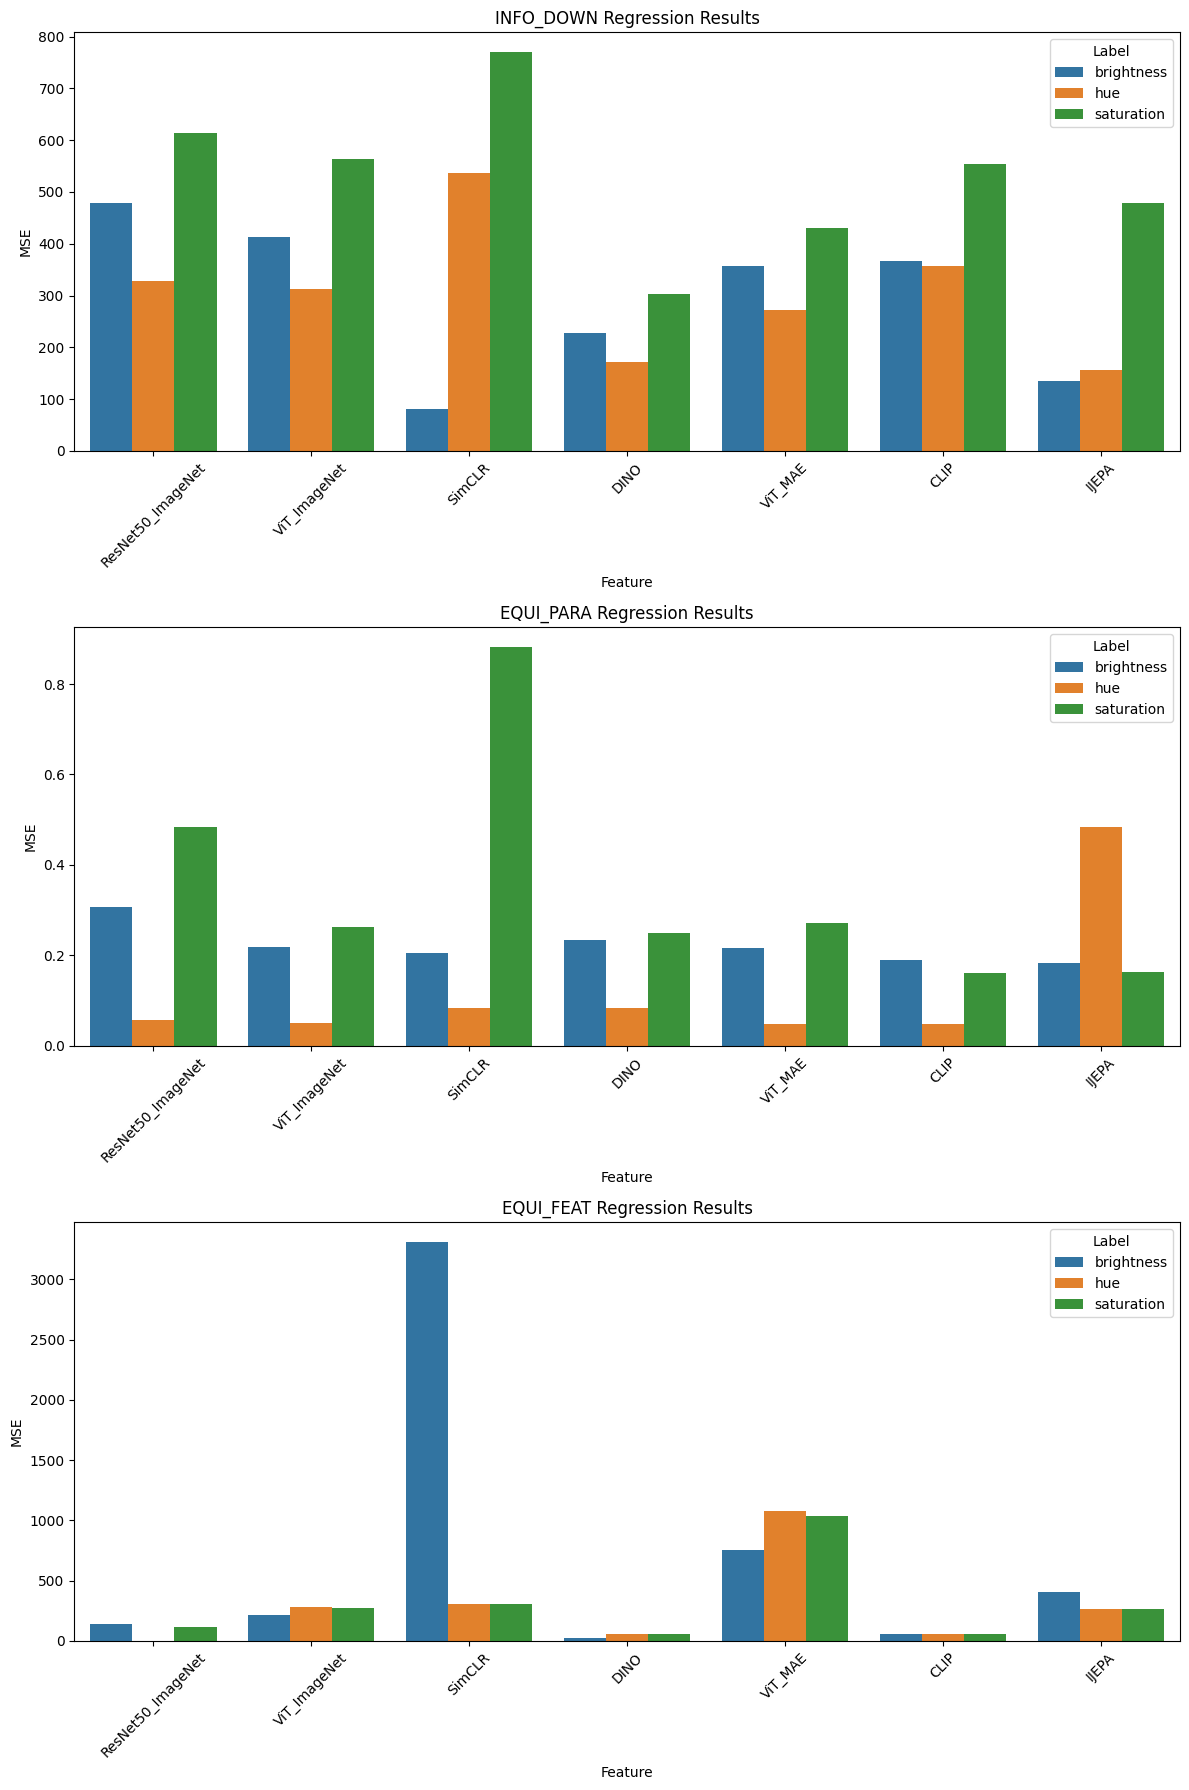

In [6]:
import json

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Define consistent feature order
feature_order = [
    "ResNet50_ImageNet",
    "ViT_ImageNet",
    "SimCLR",
    "DINO",
    "ViT_MAE",
    "CLIP",
    "IJEPA",
]

# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))

# 1. INFO_DOWN Plot
info_data = []
for run_name, metrics in results.items():
    if "INFO_DOWN_regression_" in run_name and "linear" not in run_name:
        feature = next(f for f in feature_order if f in run_name)
        label = next(l for l in ["brightness", "hue", "saturation"] if l in run_name)
        info_data.append({"Feature": feature, "Label": label, "MSE": metrics["MSE"]})

df_info = pd.DataFrame(info_data)
sns.barplot(
    data=df_info, x="Feature", y="MSE", hue="Label", ax=ax1, order=feature_order
)
ax1.set_title("INFO_DOWN Regression Results")
ax1.tick_params(axis="x", rotation=45)

# 2. EQUI_PARA Plot
para_data = []
for run_name, metrics in results.items():
    if "EQUI_PARA_regression_" in run_name and "linear" not in run_name:
        feature = next(f for f in feature_order if f in run_name)
        label = next(l for l in ["brightness", "hue", "saturation"] if l in run_name)
        para_data.append({"Feature": feature, "Label": label, "MSE": metrics["mse"]})

df_para = pd.DataFrame(para_data)
sns.barplot(
    data=df_para, x="Feature", y="MSE", hue="Label", ax=ax2, order=feature_order
)
ax2.set_title("EQUI_PARA Regression Results")
ax2.tick_params(axis="x", rotation=45)

# 3. EQUI_FEAT Plot
feat_data = []
for run_name, metrics in results.items():
    if "EQUI_FEAT_regression_" in run_name and "linear" not in run_name:
        feature = next(f for f in feature_order if f in run_name)
        label = next(l for l in ["brightness", "hue", "saturation"] if l in run_name)
        feat_data.append(
            {
                "Feature": feature,
                "Label": label,
                "MSE": metrics["avg_l2_distance"],
            }
        )

df_feat = pd.DataFrame(feat_data)
sns.barplot(
    data=df_feat,
    x="Feature",
    y="MSE",
    hue="Label",
    ax=ax3,
    order=feature_order,
)
ax3.set_title("EQUI_FEAT Regression Results")
ax3.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
import json

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Define consistent feature order
feature_order = [
    "ResNet50_ImageNet",
    "ViT_ImageNet",
    "SimCLR",
    "DINO",
    "ViT_MAE",
    "CLIP",
    "IJEPA",
]

# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))

# 1. INFO_DOWN Plot
info_data = []
for run_name, metrics in results.items():
    if "INFO_DOWN_regression_linear_" in run_name:
        feature = next(f for f in feature_order if f in run_name)
        label = next(l for l in ["brightness", "hue", "saturation"] if l in run_name)
        info_data.append({"Feature": feature, "Label": label, "MSE": metrics["MSE"]})

df_info = pd.DataFrame(info_data)
sns.barplot(
    data=df_info, x="Feature", y="MSE", hue="Label", ax=ax1, order=feature_order
)
ax1.set_title("INFO_DOWN Regression Results")
ax1.tick_params(axis="x", rotation=45)

# 2. EQUI_PARA Plot
para_data = []
for run_name, metrics in results.items():
    if "EQUI_PARA_regression_linear_" in run_name:
        feature = next(f for f in feature_order if f in run_name)
        label = next(l for l in ["brightness", "hue", "saturation"] if l in run_name)
        para_data.append({"Feature": feature, "Label": label, "MSE": metrics["mse"]})

df_para = pd.DataFrame(para_data)
sns.barplot(
    data=df_para, x="Feature", y="MSE", hue="Label", ax=ax2, order=feature_order
)
ax2.set_title("EQUI_PARA Regression Results")
ax2.tick_params(axis="x", rotation=45)

# 3. EQUI_FEAT Plot
feat_data = []
for run_name, metrics in results.items():
    if "EQUI_FEAT_regression_linear_" in run_name:
        feature = next(f for f in feature_order if f in run_name)
        label = next(l for l in ["brightness", "hue", "saturation"] if l in run_name)
        feat_data.append(
            {
                "Feature": feature,
                "Label": label,
                "MSE": metrics["avg_l2_distance"],
            }
        )

df_feat = pd.DataFrame(feat_data)
sns.barplot(
    data=df_feat,
    x="Feature",
    y="MSE",
    hue="Label",
    ax=ax3,
    order=feature_order,
)
ax3.set_title("EQUI_FEAT Regression Linear Results")
ax3.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()